In [37]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
!pip install bioinfokit
from bioinfokit.analys import stat

In [2]:
# Create a data frame with given columns and value
file = os.path.join("heart_disease_health_indicators_BRFSS2015.csv")
original_df = pd.read_csv(file)
original_df.head(20)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,2,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [3]:
original_df["BMI"].count()

253680

In [4]:
# Organize columns into a more logical order


['HeartDiseaseorAttack', 'Education']
HeartDiseaseorAttack       0      1     All
Education                                  
1                        145     29     174
2                       3265    778    4043
3                       7860   1618    9478
4                      55283   7467   62750
5                      62992   6918   69910
6                     100242   7083  107325
All                   229787  23893  253680
(2589.7898491235974, 0.0, 10)
[   174   4043   9478  62750  69910 107325]


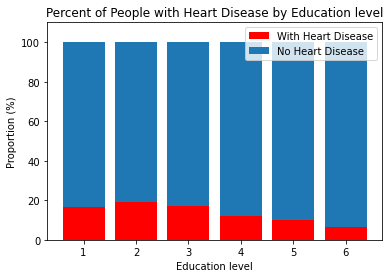

In [65]:
categorical_col = ['HeartDiseaseorAttack','Education']
print(categorical_col)
chisqt = pd.crosstab(original_df["Education"],original_df["HeartDiseaseorAttack"], margins=True)
print(chisqt)
from scipy.stats import chi2_contingency


education_levels = list(means_Grouped_education.index.values)

chisqt = pd.crosstab(original_df["Education"],original_df["HeartDiseaseorAttack"], margins=True)
value = np.array([chisqt.iloc[0][0:].values,
                  chisqt.iloc[1][0:].values,
                 chisqt.iloc[2][0:].values,
                 chisqt.iloc[3][0:].values,
                 chisqt.iloc[4][0:].values,
                 chisqt.iloc[5][0:].values])

print(chi2_contingency(value)[0:3])


# Therefore the p value is below the 0.05 threshold, Thus, these variables are not independent

## visualisation
print(chisqt.iloc[0:6][0].values+chisqt.iloc[0:6][1].values)
percent_heart_disease =  (chisqt.iloc[0:6][1].values/(chisqt.iloc[0:6][0].values+chisqt.iloc[0:6][1].values))*100
percent_no_heart_disease = (chisqt.iloc[0:6][0].values/(chisqt.iloc[0:6][0].values+chisqt.iloc[0:6][1].values))*100
loc = np.arange(6)

bar1 = plt.bar(loc,percent_heart_disease, color="red", width=.8, label="With Heart Disease")
bar2 = plt.bar(loc,percent_no_heart_disease, bottom=percent_heart_disease, width=.8, label="No Heart Disease")

plt.title("Percent of People with Heart Disease by Education level")
plt.xlabel("Education level")
plt.ylabel("Proportion (%)")
plt.ylim(0,110)
plt.xticks(loc,["1","2","3","4","5","6"])
plt.legend()



plt.show()


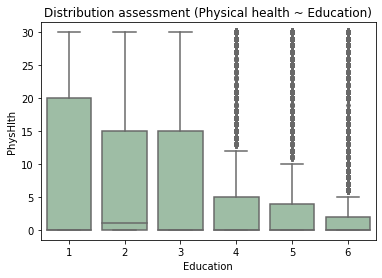

Text(0, 0.5, 'Pysical health (bad/30days)')

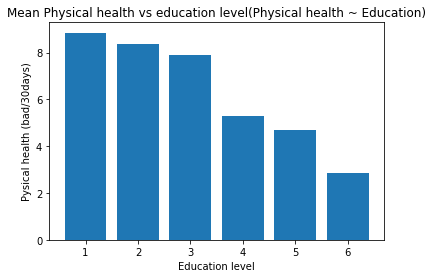

In [26]:
#########Distribution 
import seaborn as sns

ax = sns.boxplot(x='Education', y='PhysHlth', data=original_df, color='#99c2a2')
#ax = sns.swarmplot(x="Education", y="PhysHlth", data=original_df, color='#7d0013')
plt.title("Distribution assessment (Physical health ~ Education)")
plt.show()


########### Means
Grouped_education= original_df.groupby("Education")
means_Grouped_education = Grouped_education.mean()
education_levels = list(means_Grouped_education.index.values)



plt.bar(education_levels, means_Grouped_education["PhysHlth"])

plt.title("Mean Physical health vs education level(Physical health ~ Education)")
plt.xlabel("Education level")
plt.ylabel("Pysical health (bad/30days)")


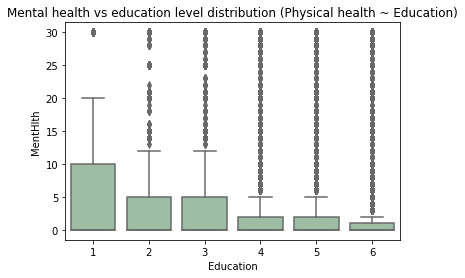

Text(0, 0.5, 'Mental health (bad/30days)')

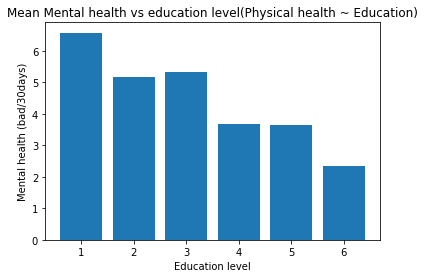

In [28]:
########Distribution
ax = sns.boxplot(x='Education', y='MentHlth', data=original_df, color='#99c2a2')
#ax = sns.swarmplot(x="Education", y="MentHlth", data=original_df, color='#7d0013')
plt.title("Mental health vs education level distribution (Physical health ~ Education)")
plt.show()


########## Mean 
plt.bar(education_levels, means_Grouped_education["MentHlth"])
plt.title("Mean Mental health vs education level(Physical health ~ Education)")
plt.xlabel("Education level")
plt.ylabel("Mental health (bad/30days)")

                                            sum_sq        df            F  \
C(Education)                          3.889993e+05       5.0  1081.463748   
C(HeartDiseaseorAttack)               5.346559e+05       1.0  7432.030241   
C(Education):C(HeartDiseaseorAttack)  6.037901e+03       5.0    16.786073   
Residual                              1.824873e+07  253668.0          NaN   

                                            PR(>F)  
C(Education)                          0.000000e+00  
C(HeartDiseaseorAttack)               0.000000e+00  
C(Education):C(HeartDiseaseorAttack)  1.269650e-16  
Residual                                       NaN  


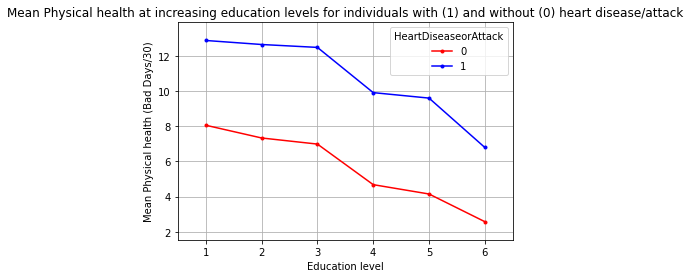

<Figure size 432x288 with 0 Axes>

15
    group1  group2      Diff     Lower     Upper    q-value  p-value
0        4       6  2.445824  2.324361  2.567287  81.151009    0.001
1        4       3  2.619076  2.352716  2.885436  39.627078    0.001
2        4       5  0.613247  0.480332  0.746162  18.594027    0.001
3        4       2  3.050079  2.657897  3.442262  31.342667    0.001
4        4       1  3.553634  1.718754  5.388515   7.805085    0.001
5        6       3  5.064900  4.805901  5.323900  78.810533    0.001
6        6       5  1.832578  1.715105  1.950050  62.869395    0.001
7        6       2  5.495904  5.108683  5.883125  57.199574    0.001
8        6       1  5.999459  4.165632  7.833286  13.184586    0.001
9        3       5  3.232323  2.967759  3.496887  49.237597    0.001
12       5       2  3.663326  3.272362  4.054291  37.761634    0.001
13       5       1  4.166881  2.332261  6.001502   9.153297    0.001
1
   group1  group2     Diff    Lower    Upper     q-value  p-value
0       0       1  5.42314  5.31

C:\Users\trist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Parameter,Value
0,Test statistics (W),1329.2291
1,Degrees of freedom (Df),5.0000
2,p value,0.0000


In [60]:
# Statistical tests 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model ANOVA 
model = ols('PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)', data=original_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# interaction plot 
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=original_df['Education'],
                       trace=original_df['HeartDiseaseorAttack'],
                       response=original_df['PhysHlth'], 
    colors=['r','b'])
plt.title("Mean Physical health at increasing education levels for individuals with (1) and without (0) heart disease/attack")
plt.xlabel("Education level")
plt.ylabel("Mean Physical health (Bad Days/30)")
plt.grid()
plt.show()
plt.savefig("Physical_health.png")
plt.show()
# there is a statistical difference but where: 

# Difference in mental health means based on education level
res = stat()
res.tukey_hsd(df=original_df, res_var='PhysHlth',
              xfac_var='Education',
              anova_model='PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] < 0.05]
print(significant_differences)

# Difference in Physical health means between individuals with heart disease and not
#tukey test
res.tukey_hsd(df=original_df, res_var='PhysHlth', xfac_var='HeartDiseaseorAttack', anova_model='PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] < 0.05]
print(significant_differences)

### interaction 
res.tukey_hsd(df=original_df, res_var='PhysHlth', xfac_var=['HeartDiseaseorAttack','Education'] , anova_model='PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] < 0.05]
print(significant_differences)


############ normality - shapiro wilks 
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

############ homogeniety of variance - levenes
res = stat()
res.levene(df=original_df, res_var='PhysHlth', xfac_var='Education')
res.levene_summary

### Large data set normality and homogeniety tests not valid 


                                            sum_sq        df           F  \
C(Education)                          1.515170e+05       5.0  560.028996   
C(HeartDiseaseorAttack)               4.097994e+04       1.0  757.339331   
C(Education):C(HeartDiseaseorAttack)  3.930350e+03       5.0   14.527152   
Residual                              1.372608e+07  253668.0         NaN   

                                             PR(>F)  
C(Education)                           0.000000e+00  
C(HeartDiseaseorAttack)               1.791553e-166  
C(Education):C(HeartDiseaseorAttack)   2.909226e-14  
Residual                                        NaN  


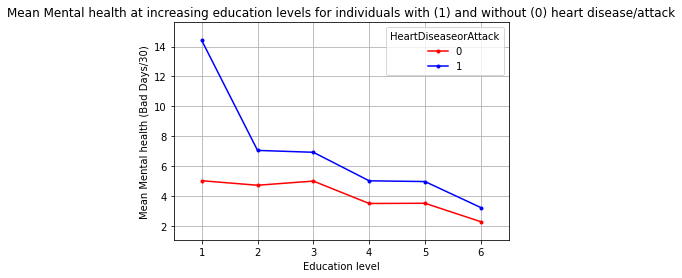

15
4
   group1  group2      Diff     Lower     Upper    q-value  p-value
0       0       1  1.640016  1.542013  1.738018  46.384996    0.001
0
    group1  group2      Diff     Lower      Upper    q-value   p-value
0   (0, 4)  (0, 6)  1.219678  1.092322   1.347034  44.262944  0.001000
1   (0, 4)  (0, 3)  1.500828  1.211031   1.790626  23.935918  0.001000
2   (0, 4)  (0, 5)  0.014023 -0.126080   0.154126   0.462598  0.900000
3   (0, 4)  (0, 2)  1.222313  0.789343   1.655283  13.047831  0.001000
4   (0, 4)  (0, 1)  1.524927 -0.474125   3.523979   3.525647  0.344969
..     ...     ...       ...       ...        ...        ...       ...
61  (1, 3)  (1, 2)  0.126001 -0.922826   1.174827   0.555243  0.900000
62  (1, 3)  (1, 1)  7.493521  2.989527  11.997515   7.689569  0.001000
63  (1, 5)  (1, 2)  2.087758  1.178700   2.996817  10.614570  0.001000
64  (1, 5)  (1, 1)  9.455279  4.981766  13.928792   9.768763  0.001000
65  (1, 2)  (1, 1)  7.367521  2.820915  11.914126   7.489417  0.001000

[66 

C:\Users\trist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Parameter,Value
0,Test statistics (W),621.6985
1,Degrees of freedom (Df),5.0000
2,p value,0.0000


<Figure size 432x288 with 0 Axes>

In [67]:
### Mental Health 
# Ordinary Least Squares (OLS) model - ANOVA 
model = ols('MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)',
            data=original_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# interaction plot 
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=original_df['Education'], trace=original_df['HeartDiseaseorAttack'],
                       response=original_df['MentHlth'], 
                        colors=['r','b'])
plt.title("Mean Mental health at increasing education levels for individuals with (1) and without (0) heart disease/attack")
plt.xlabel("Education level")
plt.ylabel("Mean Mental health (Bad Days/30)")
plt.grid()
plt.show()
plt.savefig("Mentalhealth.png")
# there is a statistical difference but where - tukey

# Difference in mental health means based on education level
res = stat()
res.tukey_hsd(df=original_df, res_var='MentHlth', xfac_var='Education', anova_model='MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] > 0.05]
print(len(significant_differences))

# Difference in mental health means between individuals with heart disease and not
#tukey test
res.tukey_hsd(df=original_df, res_var='MentHlth', xfac_var='HeartDiseaseorAttack', anova_model='MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print((res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] > 0.05]
print(len(significant_differences))

### interaction 
res.tukey_hsd(df=original_df, res_var='MentHlth', xfac_var=['HeartDiseaseorAttack','Education'] , anova_model='MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print((res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] > 0.05]
print(len(significant_differences))


############ normality - shapiro wilks 
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

############ homogeniety of variance - levenes
res = stat()
res.levene(df=original_df, res_var='MentHlth', xfac_var='Education')
res.levene_summary

### Large data set normality and homogeniety tests not valid 